# Chapter 6. 데이터 프레임의 다양한 응용

## 1. 함수 매핑
* 시리즈 또는 데이터 프레임의 개별 원소를 특정 함수에 일대일 대응 시키는 과정  
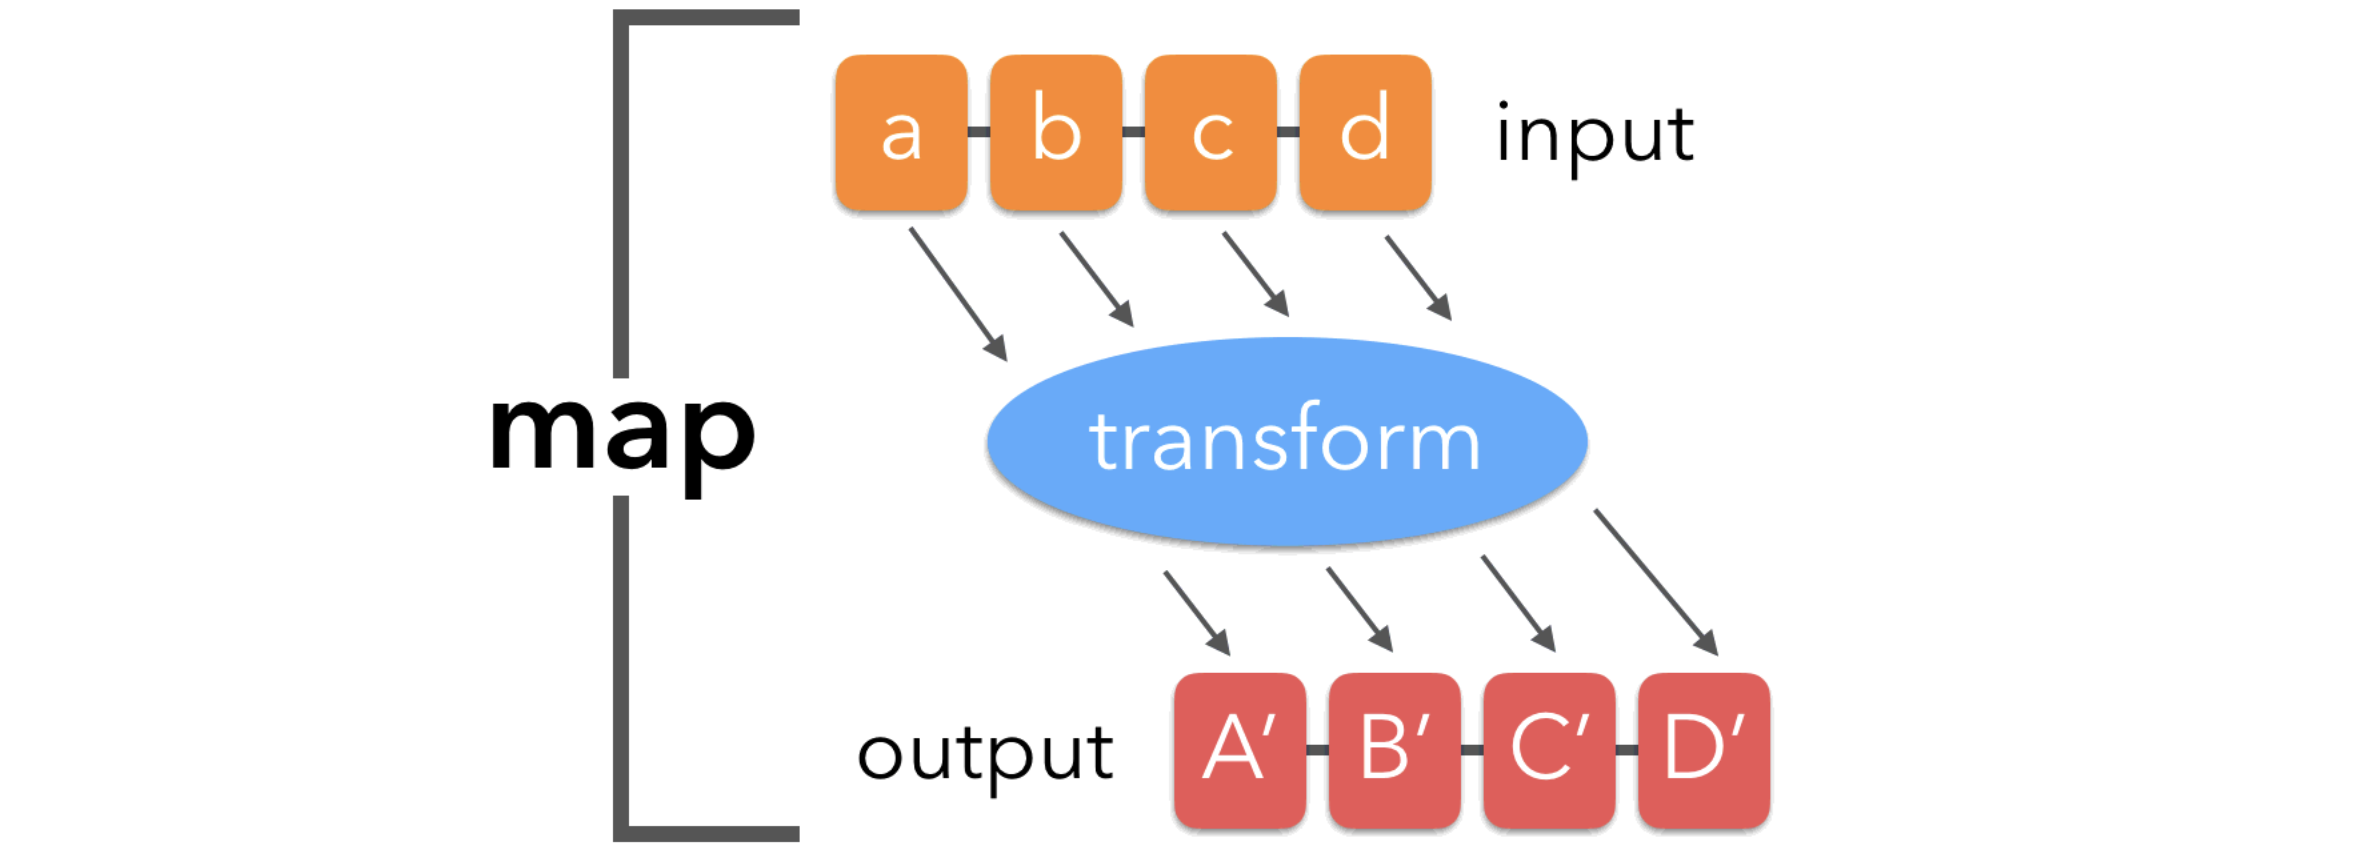

### 1-1. 개별 원소에 함수 매핑

#### 시리즈 원소에 함수 매핑
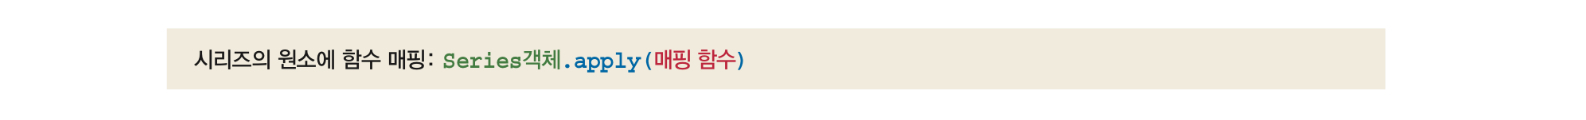

In [ ]:
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10

df.head()

In [ ]:
# 사용자 함수 정의
def add_10(n):
    return n + 10

def add_two_obj(a, b):
    return a + b

In [ ]:
# 시리즈 객체에 적용
# n = df['age']의 모든 원소

# sr1

In [ ]:
# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
# a=df['age']의 모든 원소, b=10

# sr2

In [ ]:
# 람다 함수 활용: 시리즈 객체에 적용
# apply 함수 옵션: lambda x: add_10(x)
# x=df['age']

# sr3

#### 데이터프레임 원소에 함수 매핑
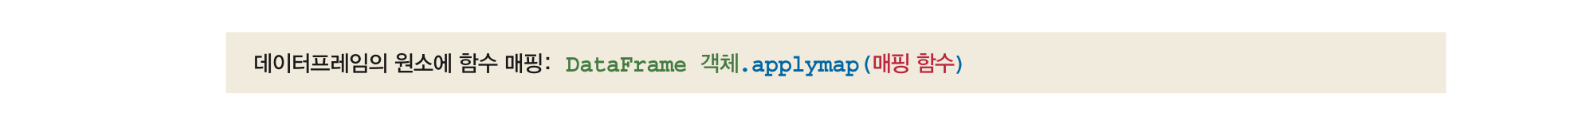

In [ ]:
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

df.head()

In [ ]:
# 사용자 함수 정의
def add_10(n):
    return n + 10

In [ ]:
# 데이터프레임에 applymap()으로 add_10() 함수를 매핑 적용

# df_map 

### 1-2. 시리즈 객체에 함수 매핑

#### 데이터프레임의 각 열에 함수 매핑
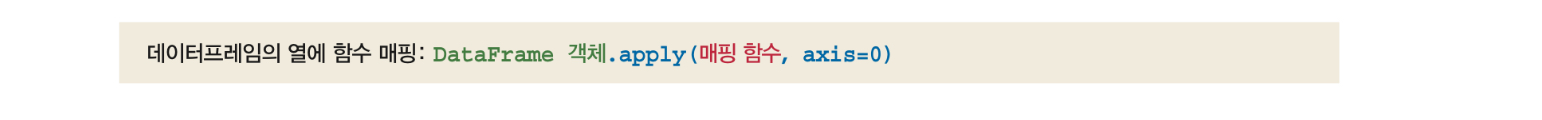

In [ ]:
# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]

In [ ]:
# 사용자 함수 정의
def missing_value(series):
    return series.isnull()

In [ ]:
# 데이터프레임의 각 열을 인수로 전달하면 데이터프레임을 반환
# apply 함수, missing_value, axis=0

# result

In [ ]:
# 사용자 함수 정의
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

In [ ]:
# 데이터프레임의 각 열을 인수로 전달하면 시리즈를 반환

# result 

#### 데이터프레임의 각 행에 함수 매핑
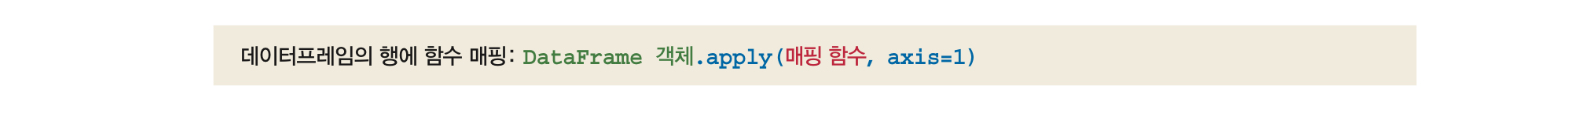

In [ ]:
# 사용자 함수 정의
def add_two_obj(a, b):    # 두 객체의 합
    return a + b

In [ ]:
# 데이터프레임의 2개 열을 선택하여 적용
# x=df, a=df['age'], b=df['ten']
# apply함수, 옵션: lambda x: add_two_obj, axis=1

# df['add']

### 1-3. 데이터 프레임 객체에 함수 매핑
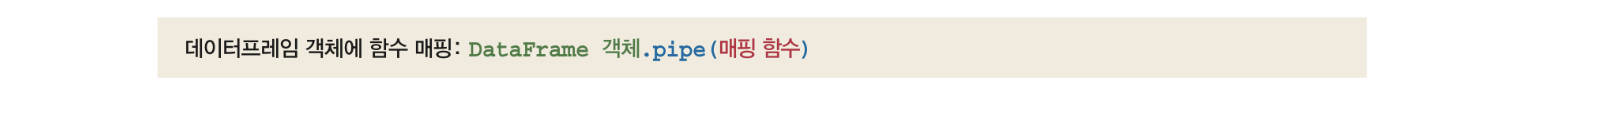
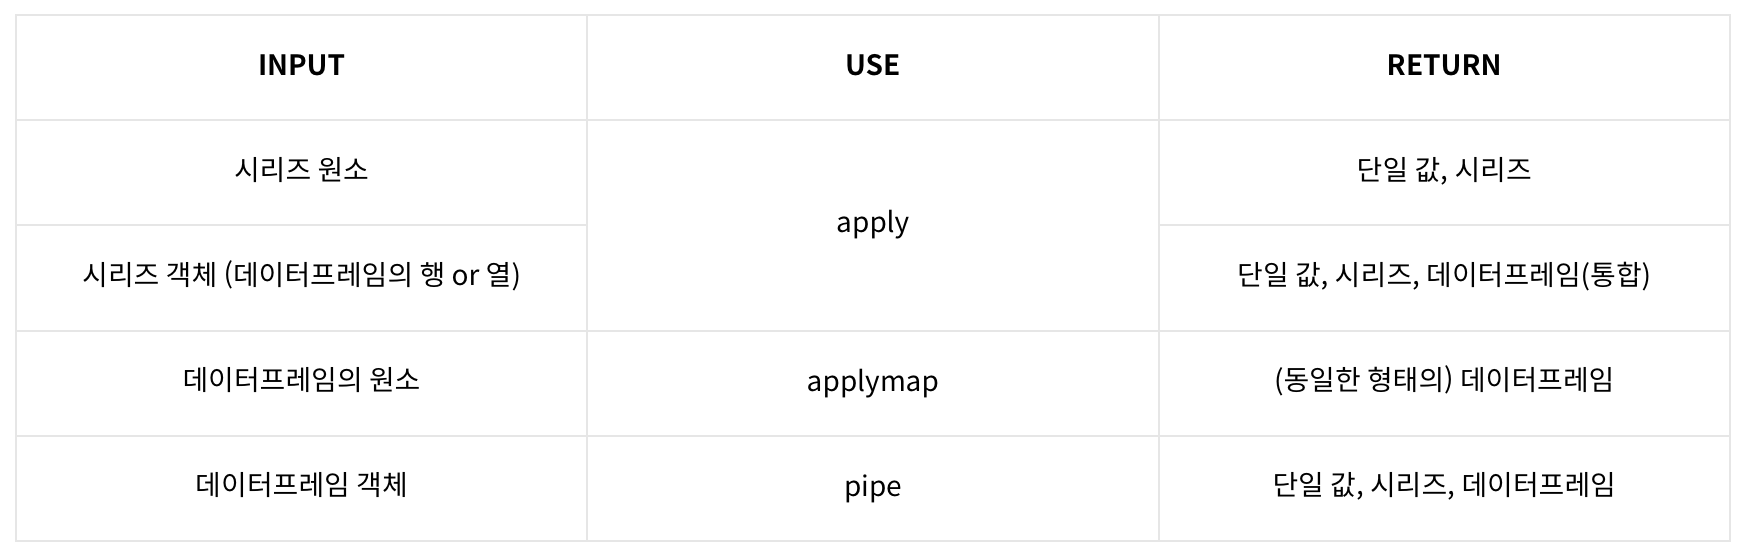

In [ ]:
# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):
    return x.isnull()    

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def totoal_number_missing(x): 
    return missing_count(x).sum()

In [ ]:
# 데이터프레임에 pipe() 메소드로 함수 매핑
result_df = df.pipe(missing_value)   

In [ ]:
result_series = df.pipe(missing_count)   

In [ ]:
result_value = df.pipe(totoal_number_missing)   

-----------

## 2. 열 재구성

### 2-1. 열 순서 변경
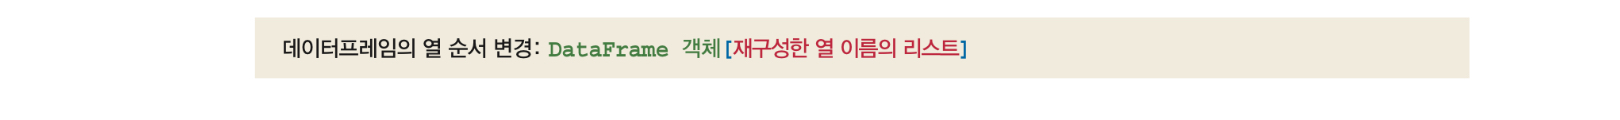

In [ ]:
# titanic 데이터셋의 부분을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
df.head()

In [ ]:
# 열 이름의 리스트 만들기
columns = list(df.columns.values)   #기존 열 이름

# 열 이름을 알파벳 순으로 정렬하기

# columns_sorted

In [ ]:
# 열 이름을 기존 순서의 정반대 역순으로 정렬하기

# columns_reversed

In [ ]:
# 새로운 df 만들기
df_reversed = df[columns_reversed]

In [ ]:
# 열 이름을 사용자가 정의한 임의의 순서로 재배치하기
columns_customed = ['pclass', 'sex', 'age', 'survived']  


### 2-2. 열 분리
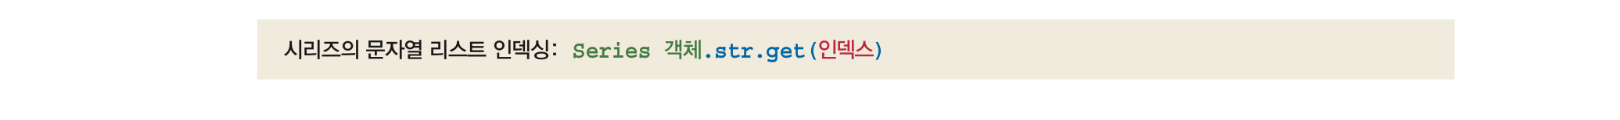

In [2]:
import pandas as pd

# 데이터셋 가져오기
df = pd.read_excel('./주가데이터.xlsx')
df.head()

연월일   당일종가  전일종가     시가     고가     저가     거래량
0 2018-07-02  10100   600  10850  10900  10000  137977
1 2018-06-29  10700   300  10550  10900   9990  170253
2 2018-06-28  10400   500  10900  10950  10150  155769
3 2018-06-27  10900   100  10800  11050  10500  133548
4 2018-06-26  10800   350  10900  11000  10700   63039

In [ ]:
# 연, 월, 일 데이터 분리하기
df['연월일'] = df['연월일'].astype('str')   # 문자열 메소드 사용을 자료형 변경
dates = df['연월일'].str.split('-')        # 문자열을 split() 메서드로 분리
print(dates, type(dates))

In [ ]:
# 분리된 정보를 각각 새로운 열에 담아서 df에 추가하기

# df['연'] 
# df['월'] 
# df['일'] 

--------

## 3. 필터링

### 3-1. 불린 인덱싱
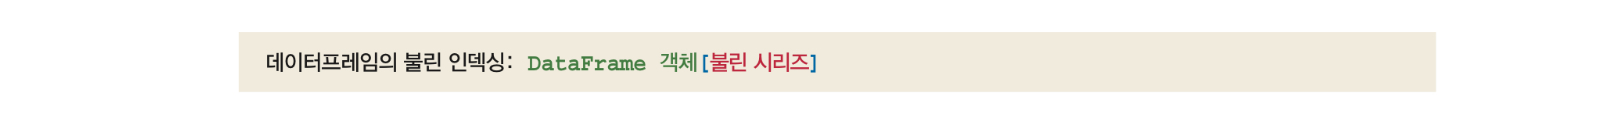

In [ ]:
# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

In [ ]:
# 나이가 10대(10~19세)인 승객만 따로 선택
mask1 = (titanic.age >= 10) & (titanic.age < 20)

# df_teenage 

In [ ]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택

# mask2 
# df_female_under10 

In [ ]:
# 나이가 10세 미만(0~9세) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
# '또는'의 연산기호 | (파이프)

# mask3 
# df_under10_morethan60 

### 3-2. isin() 메소드 활용
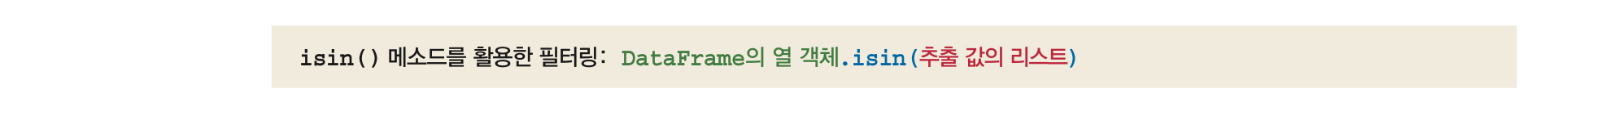

In [ ]:
# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 10)  

In [ ]:
# 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
df_boolean = titanic[mask3 | mask4 | mask5]
df_boolean.head()

In [ ]:
# isin() 메서드 활용하여 동일한 조건으로 추출

# isin_filter
# df_isin 

------

## 4. 데이터프레임 합치기

### 4-1. 데이터 프레임 연결
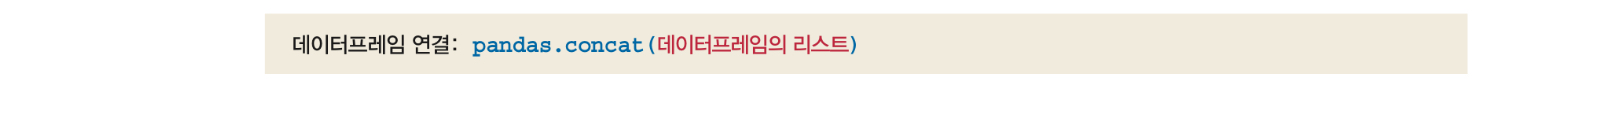
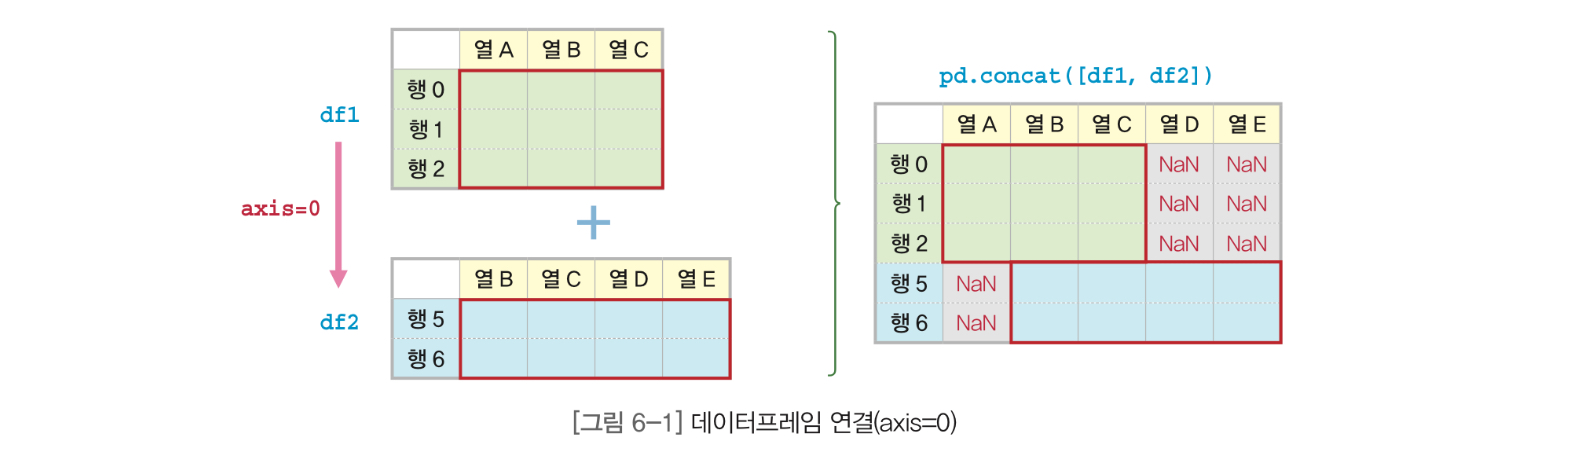
* 그림은 join='outer' 옵션 적용 예시 / join='inner' 옵션 적용 시 교집합(B,C) 만 연결

In [3]:
# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

In [ ]:
# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이듯 연결하기 

# result1

In [ ]:
# ignore_index=True 옵션 설정하기 

# result2 

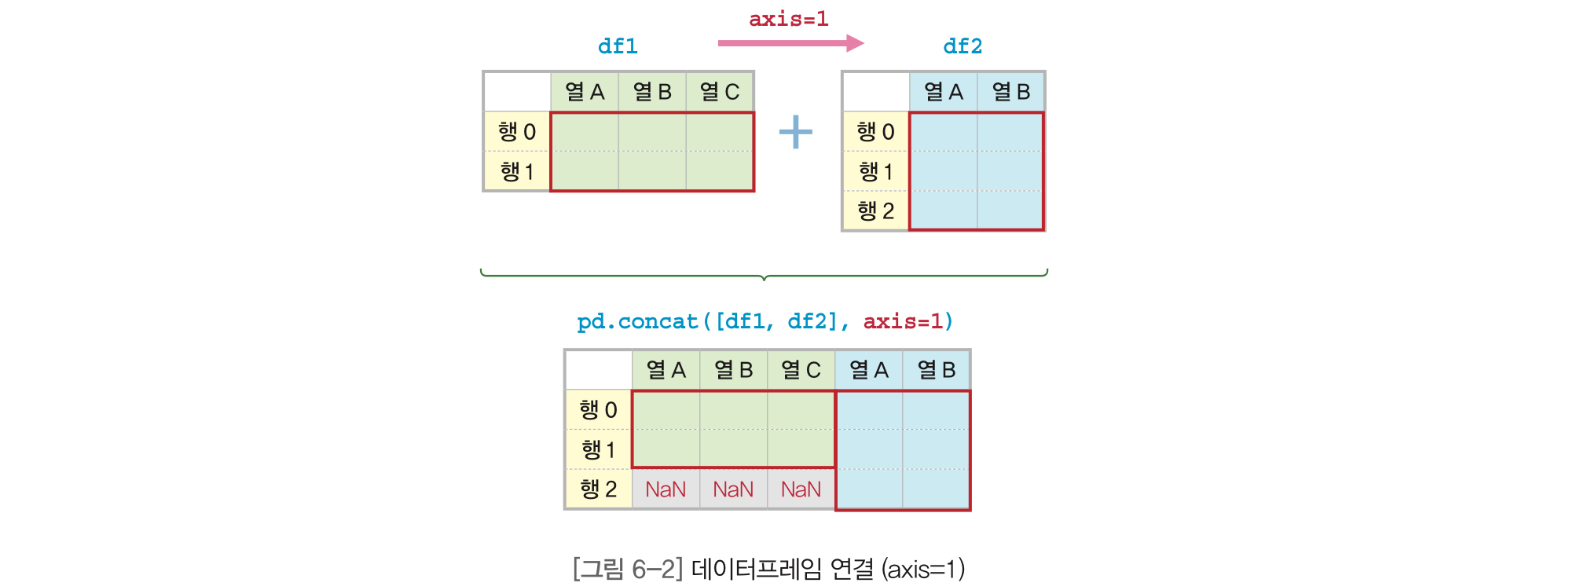

In [ ]:
# 2개의 데이터프레임을 좌우 열 방향으로 이어 붙이듯 연결하기 

# result3 

In [ ]:
# join='inner' 옵션 적용하기(교집합)

# result3_in

#### 시리즈와 데이터 프레임 연결

In [ ]:
# 시리즈 만들기
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')

In [ ]:
# df1과 sr1을 좌우 열 방향으로 연결하기

# result4 

In [ ]:
# df2과 sr2을 좌우 열 방향으로 연결하기
# sort 옵션 = True

# result5

In [ ]:
# sr1과 sr3을 좌우 열 방향으로 연결하기

# result6 

In [4]:
# s1과 s3을 위 아래 행 방향으로 연결하기 

# result7 

### 4-2. 데이터 프레임 병합
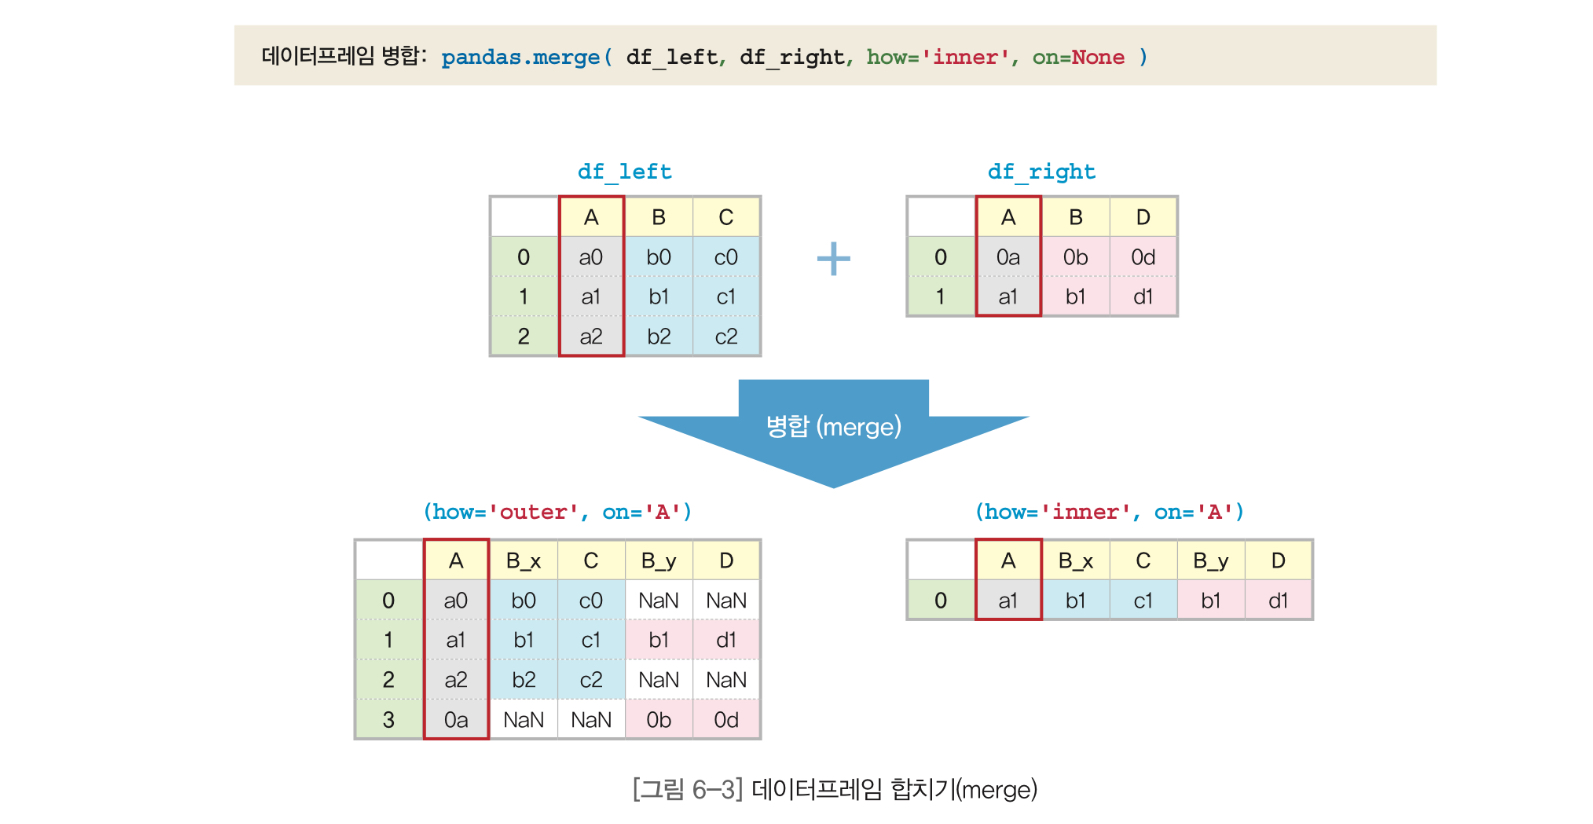

In [5]:
# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

In [6]:
# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('./stock price.xlsx')
df2 = pd.read_excel('./stock valuation.xlsx')

In [7]:
# 데이터프레임 합치기 - 교집합
# 옵션 X

# merge_inner

In [ ]:
# 데이터프레임 합치기 - 합집합
# 옵션: how='outer', on='id'

# merge_outer 

In [ ]:
# 데이터프레임 합치기 - 왼쪽 데이터프레임 기준, 키 값 분리
# 옵션: how='left', left_on='stock_name', right_on='name'

# merge_left

In [ ]:
# 데이터프레임 합치기 - 오른쪽 데이터프레임 기준, 키 값 분리
# 옵션: how='right', left_on='stock_name', right_on='name'

# merge_right

In [8]:
# 불린 인덱싱과 결합하여 원하는 데이터 찾기
price = df1[df1['price'] < 50000]

# price와 df2 merge
# value 

### 4-3. 데이터 프레임 결합
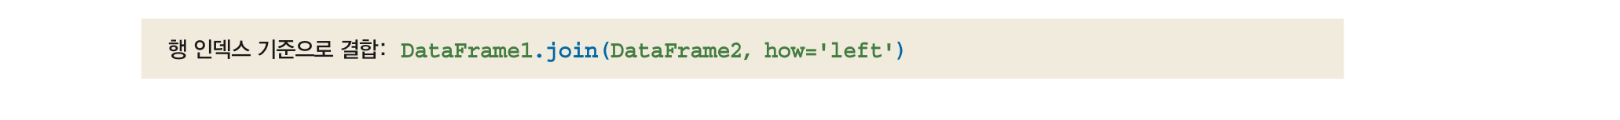
* merge 기반으로 만들어진 함수
* 행 인덱스를 기준으로 결합